In [58]:
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
 def f(x):
        return 3*x**2 - 4*x + 5

In [20]:
f(3.0)

20.0

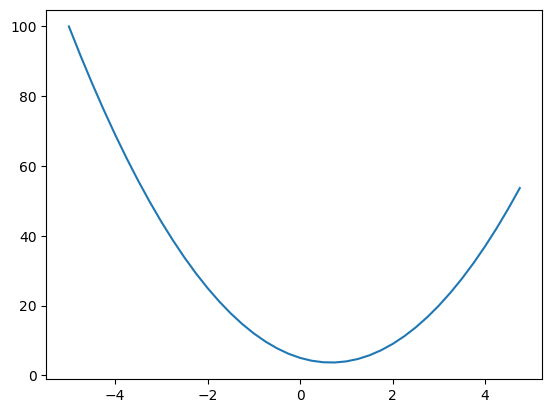

In [21]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
ys
plt.plot(xs, ys)

In [29]:
h = 0.00000000001
x = 2/3
(f(x+h)-f(x))/h

0.0

In [30]:
#more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [54]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)



d1 4.0
d2 4.0001
slope 0.9999999999976694


In [21]:
class Value:
    #constructor
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self.grad = 0.
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    #represent operation
    def __repr__(self):
        return f"Value(data = {self.data})" 
    
    #add operation
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    #multiply operation
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    
    
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L


Value(data = -8.0)

In [4]:
from  graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


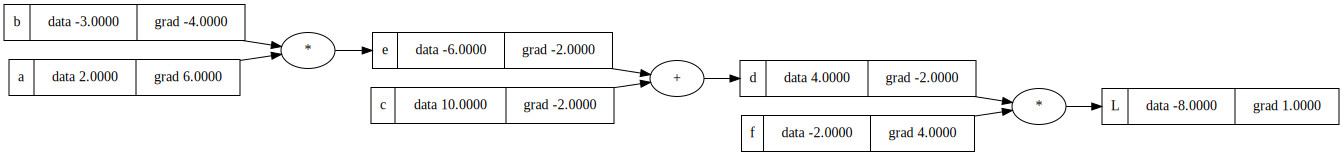

In [24]:
draw_dot(L)

In [25]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f
print(L.data)

-7.286496


In [5]:
def lol():
    h = 0.001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    b.data += h
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    print((L2-L1)/h)

lol()

-3.9999999999995595
